In [1]:
# Processing New lightcurves with upper limits

In [2]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import functools

import sys
sys.path.append('../')
from source_names_dict import source_names_dict

In [3]:
# All the points in _incbad will be in the non _incbad files, we need a way of joining the two and labelling
# the values that are and are not in _incbad

# We need a label for _UL

In [4]:
# Fix glob square bracket issue
to_replace = {'[':'[[]',
              ']':'[]]'}

In [130]:
def get_csv_dict(csv_path):
    csv_dict = {}
    # Get path
    csv_dict['path'] = csv_path
    #csv_dict['df'] = pd.read_csv(csv_path, dtype={'obsID':str})
    
    # Get Prefix
    if 'curve_nosys' in csv_path:
        csv_dict['prefix'] = 'curve_nosys'
    elif 'hardrat' in csv_path:
        csv_dict['prefix'] = 'hardrat'
    
    # Get mode
    if 'PC' in csv_path:
        csv_dict['mode'] = 'PC'
    elif 'WT' in csv_path:
        csv_dict['mode'] = 'WT'
        
    # Get incbad
    if 'incbad' in csv_path:
        csv_dict['incbad'] = True
    elif 'incbad' not in csv_path:
        csv_dict['incbad'] = False
    
    # get UL
    if 'UL' in csv_path:
        csv_dict['UL'] = True
    elif 'UL' not in csv_path:
        csv_dict['UL'] = False
        
    # get band
    if 'HARD' in csv_path:
        csv_dict['band'] = 'HARD'
    elif 'SOFT' in csv_path:
        csv_dict['band'] = 'SOFT'
    elif 'HR' in csv_path:
        csv_dict['band'] = 'HR'
    else:
        csv_dict['band'] = 'FULL'
    return csv_dict

In [73]:
df = pd.read_csv('../UKSSDC/ESO_243-49_HLX-1/USERPROD_60916/lc/hardrat_incbad_PC_HARD.csv', dtype={'obsID':str})

In [78]:
curve_nosys_PC           = pd.read_csv('../UKSSDC/ESO_243-49_HLX-1/USERPROD_60916/lc/curve_nosys_PC.csv', dtype={'obsID':str})
curve_nosys_PC_UL        = pd.read_csv('../UKSSDC/ESO_243-49_HLX-1/USERPROD_60916/lc/curve_nosys_PC_UL.csv', dtype={'obsID':str})
curve_nosys_incbad_PC    = pd.read_csv('../UKSSDC/ESO_243-49_HLX-1/USERPROD_60916/lc/curve_nosys_incbad_PC.csv', dtype={'obsID':str})
curve_nosys_incbad_PC_UL = pd.read_csv('../UKSSDC/ESO_243-49_HLX-1/USERPROD_60916/lc/curve_nosys_incbad_PC_UL.csv', dtype={'obsID':str})

hardrat_incbad_PC_HARD = pd.read_csv('../UKSSDC/ESO_243-49_HLX-1/USERPROD_60916/lc/hardrat_incbad_PC_HARD.csv', dtype={'obsID':str})

# Add Columns
curve_nosys_PC['BAD'] = False
curve_nosys_incbad_PC_UL['UL'] = True
curve_nosys_PC['MODE'] = 'PC'
curve_nosys_incbad_PC['MODE'] = 'PC'
curve_nosys_incbad_PC['MODE'] = 'PC'
curve_nosys_incbad_PC_UL['MODE'] = 'PC'

hardrat_incbad_PC_HARD['BAND'] = 'HARD'


to_merge = [curve_nosys_PC,           
            curve_nosys_PC_UL,        
            curve_nosys_incbad_PC,    
            curve_nosys_incbad_PC_UL]

# Merge dataframes
df_merge = functools.reduce(lambda left,right: pd.merge(left, right, how='outer'), to_merge)
df_merge

df_merge['BAD'].fillna(True, inplace=True)
df_merge['UL'].fillna(False, inplace=True)

# Remove duplicate obsIDs, keeping values with bad == False
df_merge = df_merge.sort_values('BAD')
df_merge = df_merge.drop_duplicates('obsID', keep='first')

# Re-sort by MJD
df_merge = df_merge.sort_values('MJD').reset_index(drop=True)
df_merge

,MJD,T_+ve,T_-ve,Rate,Ratepos,Rateneg,obsID,BAD,MODE,UL
0,54763.681304,0.569341,-0.569341,0.012766,0.002342,-0.002342,00031287001,True,PC,False
1,54771.204268,0.009576,-0.009576,0.020196,0.004809,-0.004809,00031287002,False,PC,False
2,54777.835972,0.143144,-0.143144,0.015115,0.002851,-0.002851,00031287003,False,PC,False
3,54784.262511,0.009664,-0.009664,0.025770,0.005204,-0.005204,00031287004,False,PC,False
4,55048.554186,0.233226,-0.233226,0.000996,0.000582,-0.000442,00031287005,True,PC,False
...,...,...,...,...,...,...,...,...,...,...
621,59719.326968,0.004614,-0.004614,0.016444,0.000000,0.000000,00096887008,True,PC,True
622,59726.161094,0.006602,-0.006602,0.025242,0.000000,0.000000,00096887009,True,PC,True
623,59733.256976,0.004455,-0.004455,0.019761,0.000000,0.000000,00096887010,True,PC,True
624,59740.803124,0.004846,-0.004846,0.015307,0.000000,0.000000,00096887011,True,PC,True


In [79]:
df_merge[df_merge['obsID'] == '00031287002']

,MJD,T_+ve,T_-ve,Rate,Ratepos,Rateneg,obsID,BAD,MODE,UL
1,54771.204268,0.009576,-0.009576,0.020196,0.004809,-0.004809,00031287002,False,PC,False


In [94]:
df_ULs

,MJD,T_+ve,T_-ve,Rate,Ratepos,Rateneg,obsID,BAD,MODE,UL,err_pos,err_neg
27,55241.626583,0.037844,-0.037844,0.010281,0.0,0.0,00031287028,True,PC,True,0,2
28,55253.750143,0.040046,-0.040046,0.007711,0.0,0.0,00031287029,True,PC,True,0,2
29,55261.775643,0.172183,-0.172183,0.013008,0.0,0.0,00031287030,True,PC,True,0,2
30,55269.938369,0.042115,-0.042115,0.005881,0.0,0.0,00031287031,True,PC,True,0,2
31,55277.828512,0.040155,-0.040155,0.042502,0.0,0.0,00031287032,True,PC,True,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
621,59719.326968,0.004614,-0.004614,0.016444,0.0,0.0,00096887008,True,PC,True,0,2
622,59726.161094,0.006602,-0.006602,0.025242,0.0,0.0,00096887009,True,PC,True,0,2
623,59733.256976,0.004455,-0.004455,0.019761,0.0,0.0,00096887010,True,PC,True,0,2
624,59740.803124,0.004846,-0.004846,0.015307,0.0,0.0,00096887011,True,PC,True,0,2


In [92]:
df_ULs = df_merge[df_merge['UL'] == True].copy()
df_ULs['err_pos'] = 0
df_ULs['err_neg'] = 2

In [106]:
errs = [df_ULs['err_neg'].values, df_ULs['err_pos'].values]

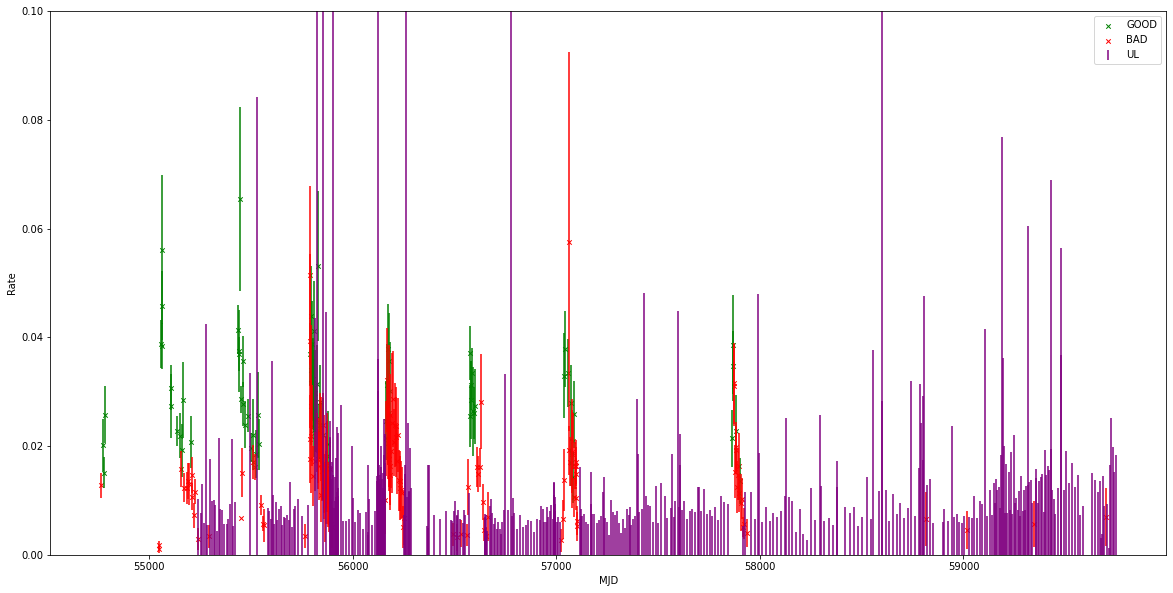

In [109]:
fig, ax = plt.subplots(figsize=(20,10), facecolor='white')
df_merge[(df_merge['BAD'] == False) & (df_merge['UL'] == False)].plot(kind='scatter', x='MJD', y='Rate', yerr='Ratepos', marker='x', lw=1.0, ax=ax, label='GOOD', color='green')
df_merge[(df_merge['BAD'] == True) & (df_merge['UL'] == False)].plot(kind='scatter', x='MJD', y='Rate', yerr='Ratepos', marker='x', lw=1.0, ax=ax, label='BAD', color='red')
ax.errorbar(x=df_ULs['MJD'], y=df_ULs['Rate'], yerr=errs, ls='none', color='purple', label='UL')
#df_ULs.plot(kind='scatter', x='MJD', y='Rate', yerr=errs, marker=r'|', s=50, ax=ax, label='UL', color='purple')
ax.set_ylim(0,0.1)
ax.legend()
#ax.set_xlim(56000,57000)
# marker=r'$\downarrow$',

In [77]:
curve_nosys_files = glob(f'../UKSSDC/{simbad_name_glob}/*/*/*.csv')
curve_nosys_files

[]

In [62]:
simbad_name_glob

'NAME_M101-ULX1'

In [140]:
for simbad_name, local_name in source_names_dict.items():
    simbad_name_glob = simbad_name.translate(str.maketrans(to_replace)) # Used to fix globbing square brackets
    curve_nosys_files = glob(f'../UKSSDC/{simbad_name_glob}/*/*/*curve_nosys*.csv')
    hardrat_files     = glob(f'../UKSSDC/{simbad_name_glob}/*/*/*hardrat*.csv')

    print(f'{simbad_name:<40} csv_files={len(hardrat_files)}')

    # Get CSV dicts
    curve_nosys_dicts = [get_csv_dict(csv) for csv in curve_nosys_files]
    hardrat_dicts     = [get_csv_dict(csv) for csv in hardrat_files]

    dfs_curve_nosys = []
    for d in curve_nosys_dicts:
        print(d)
        df = pd.read_csv(d['path'], dtype={'obsID':str})
        df['MODE'] = d['mode']
        df['BAD']  = d['incbad']
        df['UL']   = d['UL']
        df['BAND'] = d['band']
        dfs_curve_nosys.append(df)
        
    # Merge dataframes
    df_merge = functools.reduce(lambda left,right: pd.merge(left, right, how='outer'), dfs_curve_nosys)

    # Remove duplicate obsIDs, keeping values with bad == False
    df_merge = df_merge.sort_values('BAD')
    df_merge = df_merge.drop_duplicates('obsID', keep='first')

    # Re-sort by MJD
    df_merge = df_merge.sort_values('MJD').reset_index(drop=True)
    df_merge
    
    print(df_merge)
        
    print('-'*50 + ' NOW DOING HARDRAT' + '-'*50)
    
    
    dfs_hardrat = []
    for d in hardrat_dicts:
        df = pd.read_csv(d['path'], dtype={'obsID':str})
        df['MODE'] = d['mode']
        df['BAD']  = d['incbad']
        df['UL']   = d['UL']
        df['BAND'] = d['band']
        dfs_hardrat.append(df)
        
        
    # Merge dataframes
    df_merge = functools.reduce(lambda left,right: pd.merge(left, right, how='outer'), dfs_hardrat)

    # Remove duplicate obsIDs, keeping values with bad == False
    df_merge = df_merge.sort_values('BAD')
    df_merge = df_merge.drop_duplicates('obsID', keep='first')

    # Re-sort by MJD
    df_merge = df_merge.sort_values('MJD').reset_index(drop=True)
    df_merge
    
    print(df_merge)
        
    
    print('='*100)


ESO_243-49_HLX-1                         csv_files=6
{'path': '../UKSSDC/ESO_243-49_HLX-1/USERPROD_60916/lc/curve_nosys_incbad_PC.csv', 'prefix': 'curve_nosys', 'mode': 'PC', 'incbad': True, 'UL': False, 'band': 'FULL'}
{'path': '../UKSSDC/ESO_243-49_HLX-1/USERPROD_60916/lc/curve_nosys_incbad_PC_UL.csv', 'prefix': 'curve_nosys', 'mode': 'PC', 'incbad': True, 'UL': True, 'band': 'FULL'}
{'path': '../UKSSDC/ESO_243-49_HLX-1/USERPROD_60916/lc/curve_nosys_PC.csv', 'prefix': 'curve_nosys', 'mode': 'PC', 'incbad': False, 'UL': False, 'band': 'FULL'}
{'path': '../UKSSDC/ESO_243-49_HLX-1/USERPROD_60916/lc/curve_nosys_PC_UL.csv', 'prefix': 'curve_nosys', 'mode': 'PC', 'incbad': False, 'UL': True, 'band': 'FULL'}
              MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0    54763.681304  0.569341 -0.569341  0.012766  0.002342 -0.002342   
1    54771.204268  0.009576 -0.009576  0.020196  0.004809 -0.004809   
2    54777.835972  0.143144 -0.143144  0.015115  0.002851 -0.002851   
3  

TypeError: reduce() of empty iterable with no initial value

In [118]:
curve_incbad_PC['FLAG_UL'] = False
curve_incbad_PC['MODE']    = 'PC'

NameError: name 'curve_incbad_PC' is not defined

In [ ]:
curve_incbad_PC_UL['FLAG_UL'] = True
curve_incbad_PC_UL['MODE']    = 'PC'
curve_incbad_PC_UL

In [ ]:
pd.concat([curve_incbad_PC, curve_incbad_PC_UL], ignore_index=True).sort_values('MJD')

ESO_243-49_HLX-1                         ESO243-49
NAME_Holmberg_IX_X-1                     Holmberg_IX
Holmberg_II_X-1                          Holmberg_II
M31_ULX-1                                M31
[LM2005]_NGC_598_ULX1                    M33
RX_J133001+47137                         M51
[LM2005]_NGC_3031_ULX1                   M81
M82_X-2                                  M82
[LM2005]_NGC_1042_ULX1                   NGC1042
NAME_NGC_1313_X-1                        NGC1313
NAME_NGC_1313_X-2                        NGC1313
[LM2005]_NGC_247_ULX1                    NGC247
[LB2005]_NGC_253_X2                      NGC253
[LB2005]_NGC_253_X9                      NGC253
NAME_NGC_300_ULX1                        NGC300
[LM2005]_NGC_4395_ULX1                   NGC4395
[LM2005]_NGC_5204_ULX1                   NGC5204
[LM2005]_NGC_5408_ULX1                   NGC5408
[SRW2006b]_NGC_55_ULX                    NGC55
[SST2011]_J141939.39+564137.8            NGC5585
NAME_NGC_5907_ULX                   

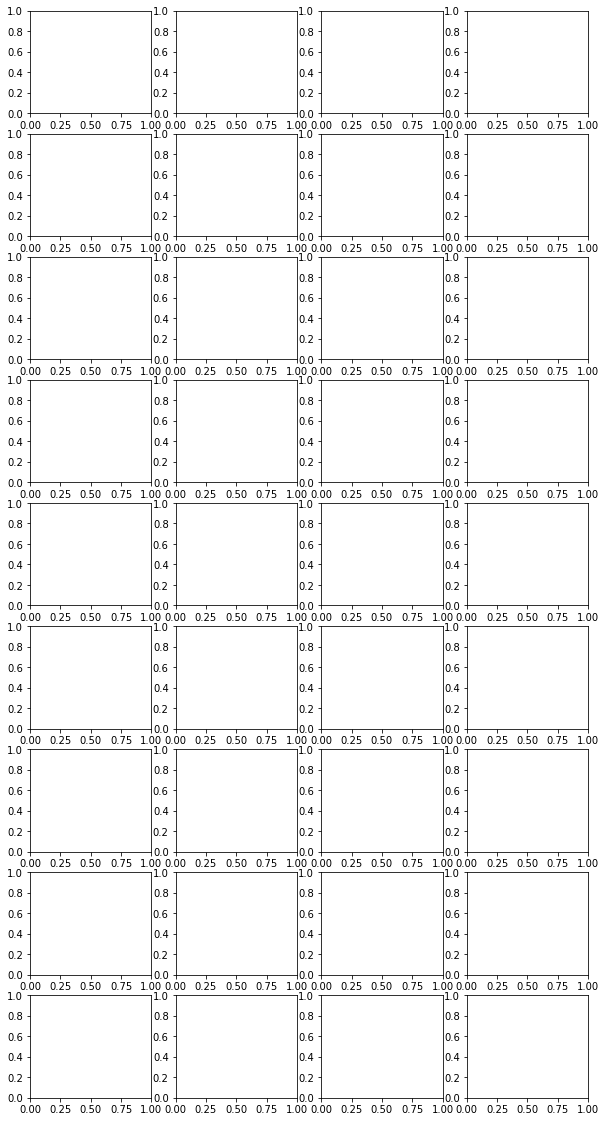

In [34]:
fig, ax = plt.subplots(9,4, figsize=(10,20))
axes = ax.flatten()

i = 0
for simbad_name, local_name in source_names_dict.items():
    simbad_name_glob = simbad_name.translate(str.maketrans(to_replace)) # Used to fix globbing square brackets
    print(f'{simbad_name:<40} {local_name}')
    csv_files = glob(f'../UKSSDC/{simbad_name_glob}/*/*/*curve_incbad_PC.csv')
    if len(csv_files) > 0:
        df = pd.read_csv(csv_files[0], dtype={'obsID':str})
        yerr = (df['Rateneg'].abs(), df['Ratepos'])
        axes[i].errorbar(df['MJD'], df['Rate'], yerr=yerr, label=simbad_name, ls='none', capsize=1.0, lw=1.0, color='black')
        axes[i].legend()
        i+=1

In [35]:
csv_files

[]